### K-평균 군집화 ( K-means )

In [2]:
import pandas as pd
customer = pd.read_csv('Data/customer_join4.csv')
customer.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
calc_date           0
membership          0
dtype: int64

In [3]:
# 경고(warning) 비표시 
import warnings
warnings.filterwarnings('ignore')

In [6]:
customer_clustering = customer[['mean', 'median', 'max', 'min', 'membership']]
customer_clustering.head(2)                                

,mean,median,max,min,membership
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47


In [ ]:
## 항목간 Value 차가 큼 --> 표준화


In [7]:
from sklearn.cluster import KMeans    ##  K-means 임포트
from sklearn.preprocessing import StandardScaler ##  표준화를 위해 임포트
sc = StandardScaler()

In [8]:
customer_clustering_sc = sc.fit_transform(customer_clustering)
customer_clustering_sc

array([[-0.28120614, -0.13367635,  0.08117747, -0.5336197 ,  2.03402524],
       [-0.14054502, -0.13367635, -0.37992814, -0.02114919,  2.03402524],
       [-0.42186727, -0.13367635, -0.84103375, -0.02114919,  2.03402524],
       ...,
       [ 1.50050144,  1.46662237,  0.08117747,  2.54120338, -1.28811491],
       [ 3.18843493,  3.06692109,  1.46449428,  4.07861492, -1.28811491],
       [ 2.62579043,  2.53348819,  1.00338868,  3.56614441, -1.28811491]])

In [9]:
## 회원 그룹화 (K평균 군집화)

kmeans = KMeans(n_clusters = 4 ) # 그룹 4개로 지정 클러스터 모델구축
clusters = kmeans.fit(customer_clustering_sc) # Clustering 실행
customer_clustering['cluster'] = clusters.labels_ # clustering 결과 저장

In [10]:
print(customer_clustering['cluster'].unique()) # data 그룹번호
customer_clustering

[2 0 1 3]


,mean,median,max,min,membership,cluster
0,4.833333,5.0,8,2,47,2
1,5.083333,5.0,7,3,47,2
2,4.583333,5.0,6,3,47,2
3,4.833333,4.5,7,2,47,2
4,3.916667,4.0,6,1,47,2
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,3
4188,10.000000,10.0,10,10,1,3
4189,8.000000,8.0,8,8,1,3
4190,11.000000,11.0,11,11,1,3


In [11]:
customer_clustering.to_csv("Data/customer_clustering2.csv", \
                                               index=False,  encoding='utf-8-sig')

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('Data/customer_clustering2.csv')
df.head()

,mean,median,max,min,membership,cluster
0,4.833333,5.0,8,2,47,2
1,5.083333,5.0,7,3,47,2
2,4.583333,5.0,6,3,47,2
3,4.833333,4.5,7,2,47,2
4,3.916667,4.0,6,1,47,2


<Axes: xlabel='cluster', ylabel='membership'>

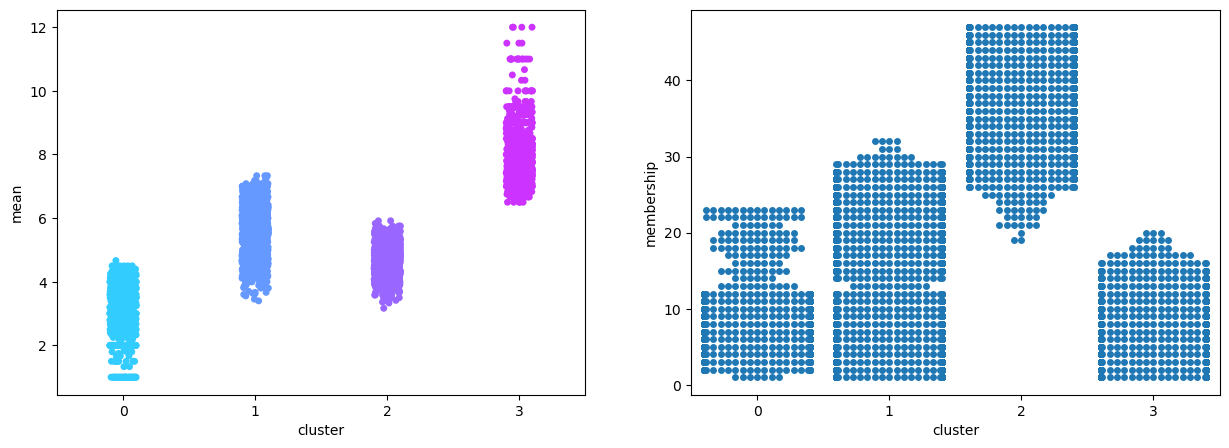

In [15]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(x = 'cluster', y = 'mean', data = df, ax = ax1, palette = 'cool')
sns.swarmplot(x = 'cluster', y = 'membership', data = df, ax = ax2)

<Axes: xlabel='cluster', ylabel='median'>

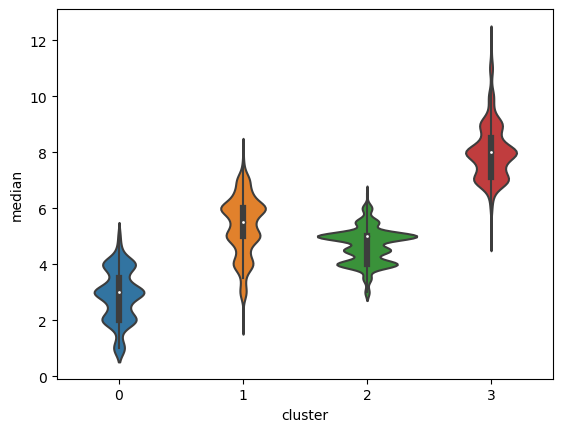

In [16]:
sns.violinplot(x = 'cluster', y = 'median', data = df)

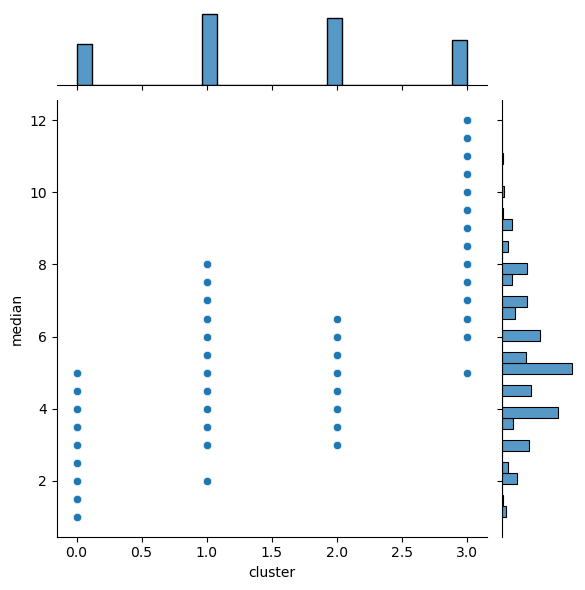

In [17]:
sns.jointplot(x = 'cluster', y = 'median', data = df)

In [19]:
df.columns = ['월평균값','월중앙값','월최대값','월최소값','회원기간','cluster']
df

,월평균값,월중앙값,월최대값,월최소값,회원기간,cluster
0,4.833333,5.0,8,2,47,2
1,5.083333,5.0,7,3,47,2
2,4.583333,5.0,6,3,47,2
3,4.833333,4.5,7,2,47,2
4,3.916667,4.0,6,1,47,2
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,3
4188,10.000000,10.0,10,10,1,3
4189,8.000000,8.0,8,8,1,3
4190,11.000000,11.0,11,11,1,3


In [21]:
df.groupby('cluster').count()

,월평균값,월중앙값,월최대값,월최소값,회원기간
cluster,,,,,
0,763,763,763,763,763
1,1334,1334,1334,1334,1334
2,1249,1249,1249,1249,1249
3,846,846,846,846,846


In [22]:
df.groupby('cluster').mean()

,월평균값,월중앙값,월최대값,월최소값,회원기간
cluster,,,,,
0,3.054713,2.888598,4.756225,1.653997,9.263434
1,5.524239,5.375187,8.745877,2.687406,14.843328
2,4.677494,4.671337,7.232986,2.153723,36.915933
3,8.054608,8.039598,10.009456,6.160757,7.072104


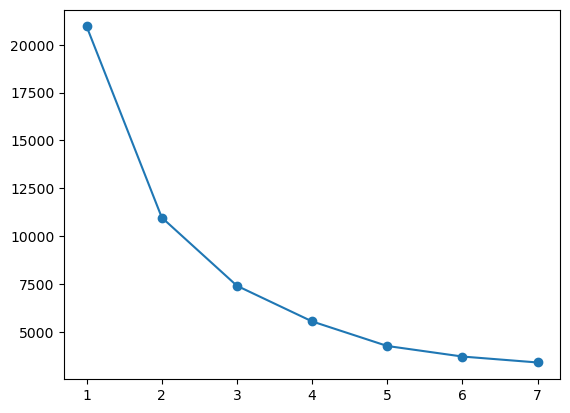

In [23]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

temp=[]
for i in range(1,8):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(customer_clustering_sc)
    temp.append(kmeans.inertia_)

    
plt.plot(range(1,8),temp, marker='o')

In [24]:
# 기울기가 완만하다고 생각되는 Cluster 객수 결정